In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [4]:
#import data 
df = pd.read_csv('newborn_health_monitoring_with_risk.csv')

df.head()

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
0,B001,Sara,Female,40.2,3.3,50.0,31.9,12/10/24,1,3.28,...,98,Formula,11,9,0,4.2,7.0,Yes,Yes,At Risk
1,B001,Sara,Female,40.2,3.3,50.0,31.9,12/11/24,2,3.35,...,99,Formula,11,5,2,10.6,NaN,No,No,At Risk
2,B001,Sara,Female,40.2,3.3,50.0,31.9,12/12/24,3,3.35,...,97,Breastfeeding,7,6,5,9.8,NaN,No,No,Healthy
3,B001,Sara,Female,40.2,3.3,50.0,31.9,12/13/24,4,3.48,...,97,Mixed,11,8,4,8.1,NaN,No,Yes,Healthy
4,B001,Sara,Female,40.2,3.3,50.0,31.9,12/14/24,5,3.50,...,96,Breastfeeding,11,7,1,11.6,NaN,No,Yes,At Risk


In [19]:
#remove irrelevant attributes
#df = df.drop(['baby_id', 'name', 'date'], axis=1)
df.head()

,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,...,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level,apgar_present,feeding_Breastfeeding,feeding_Formula,feeding_Mixed,gestational_age_bin
0,0,40.2,3.3,50.0,31.9,1,3.28,50.1,32.0,37.0,...,4.2,7.0,1,1,At Risk,1,0,1,0,1
1,0,40.2,3.3,50.0,31.9,2,3.35,50.2,32.0,37.2,...,10.6,NaN,0,0,At Risk,0,0,1,0,1
2,0,40.2,3.3,50.0,31.9,3,3.35,50.6,32.1,37.1,...,9.8,NaN,0,0,Healthy,0,1,0,0,1
3,0,40.2,3.3,50.0,31.9,4,3.48,50.3,32.0,37.4,...,8.1,NaN,0,1,Healthy,0,0,0,1,1
4,0,40.2,3.3,50.0,31.9,5,3.50,50.3,31.8,36.8,...,11.6,NaN,0,1,At Risk,0,1,0,0,1


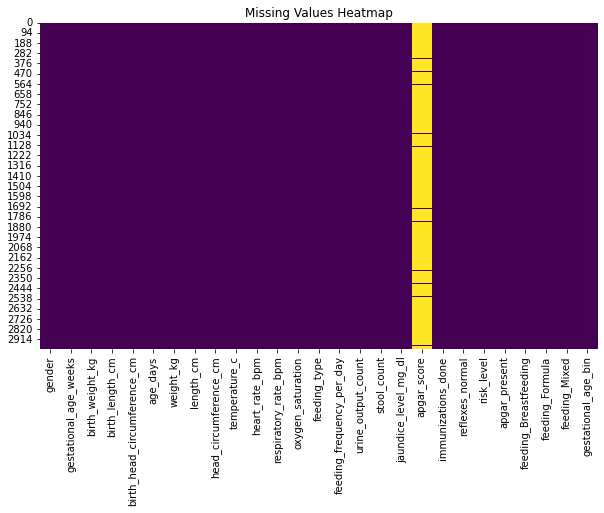

In [20]:
#missing values 
df.isnull().sum()
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

   apgar_score  apgar_present
0          7.0              1
1          NaN              0
2          NaN              0
3          NaN              0
4          NaN              0
5          NaN              0
6          NaN              0
7          NaN              0
8          NaN              0
9          NaN              0


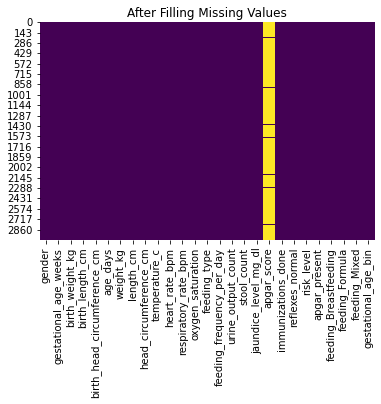

,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,...,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level,apgar_present,feeding_Breastfeeding,feeding_Formula,feeding_Mixed,gestational_age_bin
0,0,40.2,3.3,50.0,31.9,1,3.28,50.1,32.0,37.0,...,4.2,7.0,1,1,At Risk,1,0,1,0,1
1,0,40.2,3.3,50.0,31.9,2,3.35,50.2,32.0,37.2,...,10.6,NaN,0,0,At Risk,0,0,1,0,1
2,0,40.2,3.3,50.0,31.9,3,3.35,50.6,32.1,37.1,...,9.8,NaN,0,0,Healthy,0,1,0,0,1
3,0,40.2,3.3,50.0,31.9,4,3.48,50.3,32.0,37.4,...,8.1,NaN,0,1,Healthy,0,0,0,1,1
4,0,40.2,3.3,50.0,31.9,5,3.50,50.3,31.8,36.8,...,11.6,NaN,0,1,At Risk,0,1,0,0,1


In [21]:
#new column for binary values 
df['apgar_present'] = (df['apgar_score'].notnull().astype(int))
print(df[['apgar_score', 'apgar_present']].head(10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('After Filling Missing Values')
plt.show()
df.head()

In [22]:
#binarize feeding column (3 categories)
feeding_dummies = pd.get_dummies(df['feeding_type'], prefix='feeding')
df = pd.concat([df, feeding_dummies], axis=1)

#binarize gender, immunization, reflexes (2 catgories )
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['immunizations_done'] = df['immunizations_done'].map({'Yes': 1, 'No': 0})
df['reflexes_normal'] = df['reflexes_normal'].map({'Yes': 1, 'No': 0})

#binarize gestational age (full term 39 weeks)
df['gestational_age_bin'] = df['gestational_age_weeks'].apply(lambda x: 1 if x >= 39 else 0)
print(df[['gestational_age_weeks', 'gestational_age_bin']].head(10))
print(df['gestational_age_bin'].value_counts())

df.head()


   gestational_age_weeks  gestational_age_bin
0                   40.2                    1
1                   40.2                    1
2                   40.2                    1
3                   40.2                    1
4                   40.2                    1
5                   40.2                    1
6                   40.2                    1
7                   40.2                    1
8                   40.2                    1
9                   40.2                    1
0    1650
1    1350
Name: gestational_age_bin, dtype: int64


,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,...,reflexes_normal,risk_level,apgar_present,feeding_Breastfeeding,feeding_Formula,feeding_Mixed,gestational_age_bin,feeding_Breastfeeding,feeding_Formula,feeding_Mixed
0,NaN,40.2,3.3,50.0,31.9,1,3.28,50.1,32.0,37.0,...,NaN,At Risk,1,0,1,0,1,0,1,0
1,NaN,40.2,3.3,50.0,31.9,2,3.35,50.2,32.0,37.2,...,NaN,At Risk,0,0,1,0,1,0,1,0
2,NaN,40.2,3.3,50.0,31.9,3,3.35,50.6,32.1,37.1,...,NaN,Healthy,0,1,0,0,1,1,0,0
3,NaN,40.2,3.3,50.0,31.9,4,3.48,50.3,32.0,37.4,...,NaN,Healthy,0,0,0,1,1,0,0,1
4,NaN,40.2,3.3,50.0,31.9,5,3.50,50.3,31.8,36.8,...,NaN,At Risk,0,1,0,0,1,1,0,0


# Data Visualization

Notes: 
For data visualization:
-histogram of numeric columns
-boxplots of numeric columns
-visualize plot for categorical/binary columns 
-correlation heatmap for numeric values
    -scatter 
    -line plots for each baby for each baby ?
    

In [23]:
#classify columns 
numeric_cols = df.select_dtypes(include='number').columns.tolist() 
binary_cols = [col for col in numeric_cols if df[col].nunique() == 2]
numeric_cols_only = [col for col in numeric_cols if col not in binary_cols]
categorical_cols = df.select_dtypes(include='object').columns.tolist()


print("Numeric columns:", numeric_cols_only)
print("Binary columns:", binary_cols)
print("Categorical columns:", categorical_cols)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

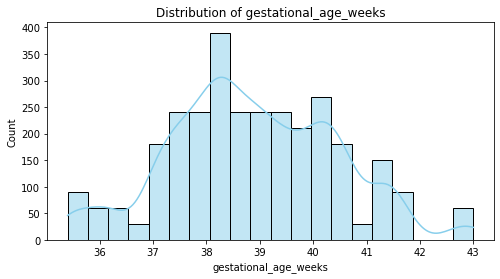

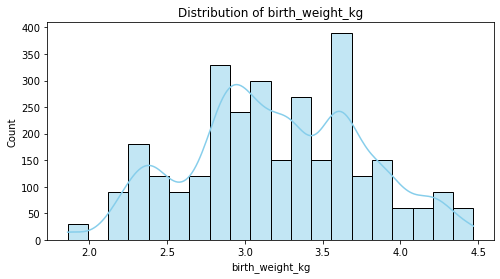

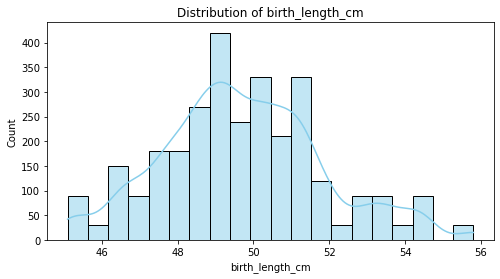

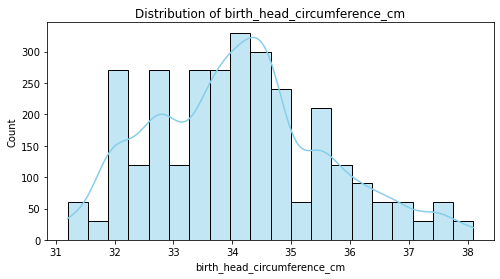

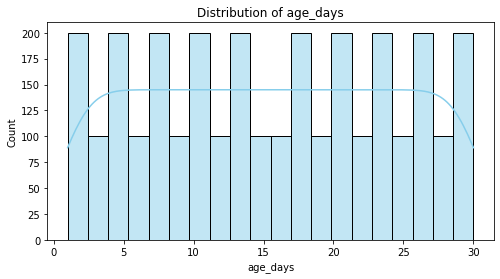

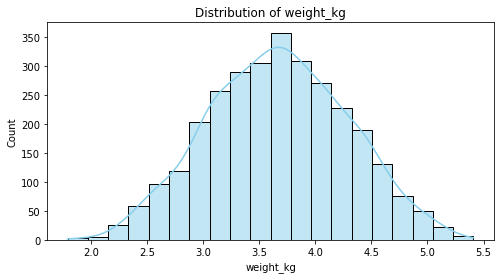

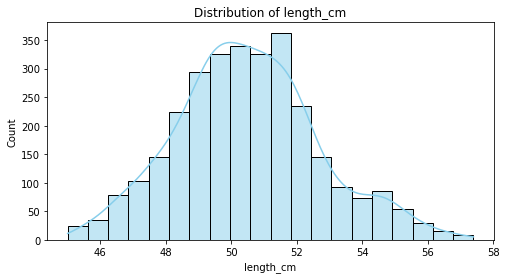

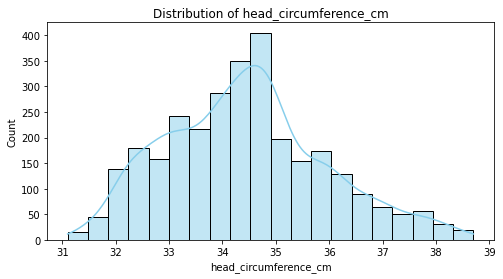

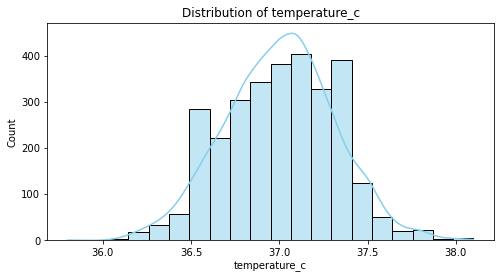

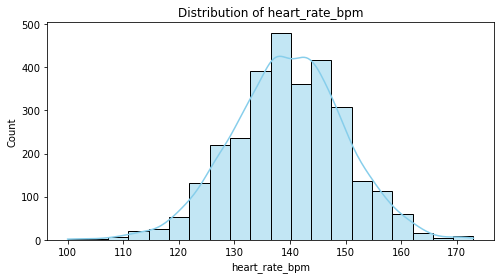

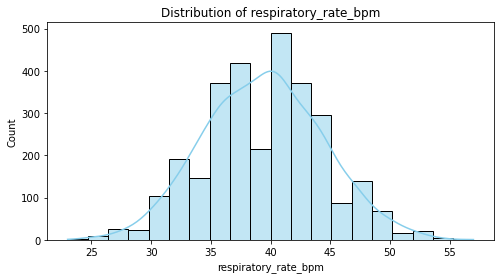

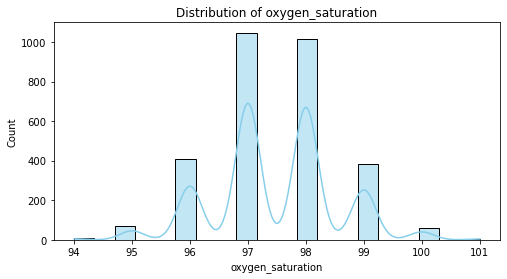

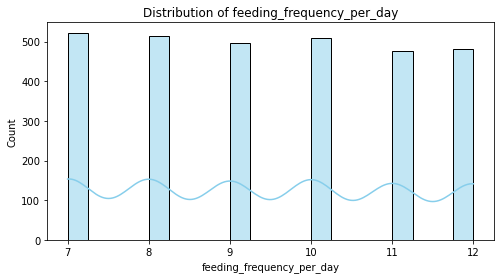

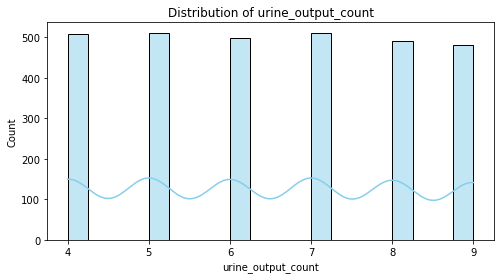

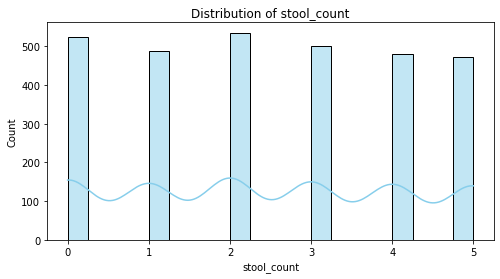

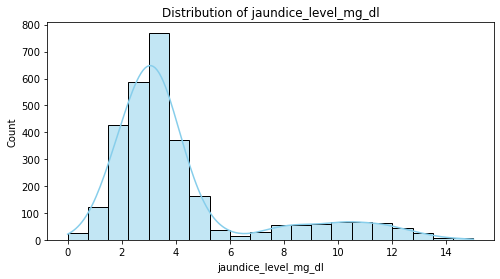

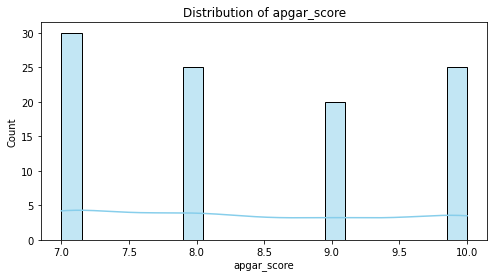

In [24]:
#histograms for distribution 
for col in numeric_cols_only:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

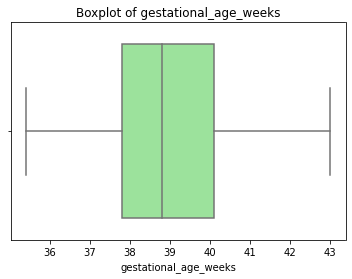

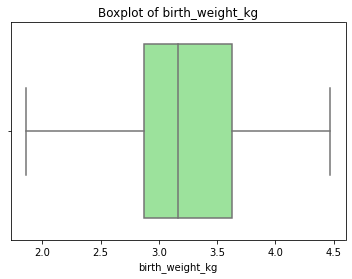

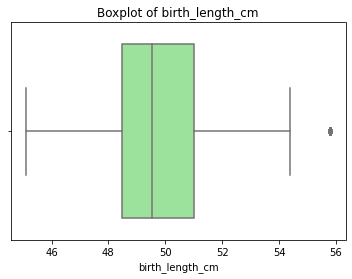

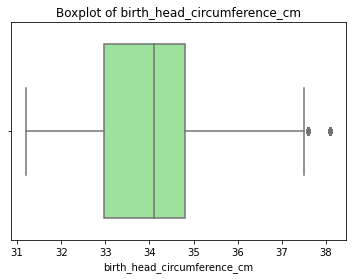

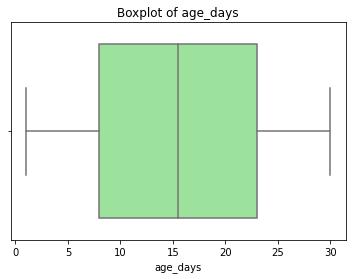

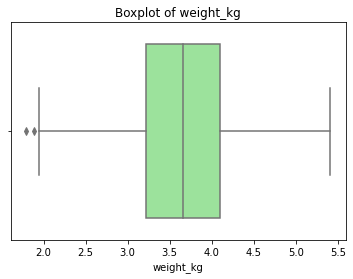

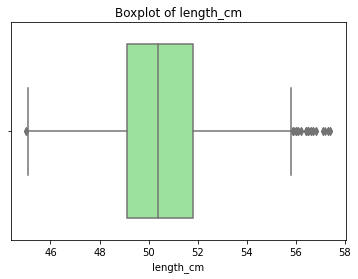

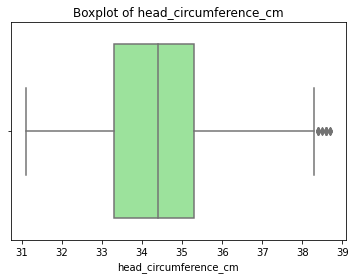

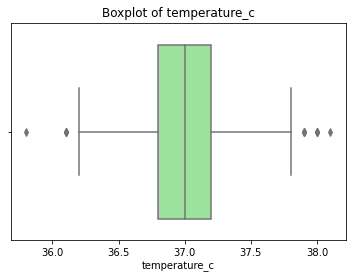

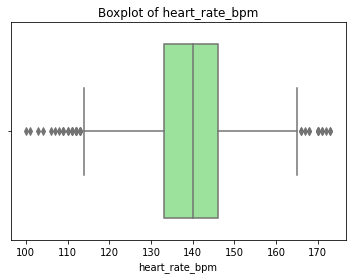

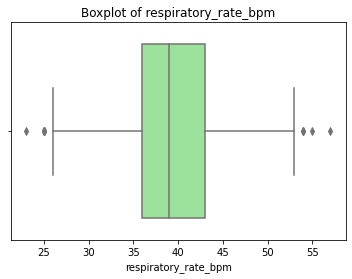

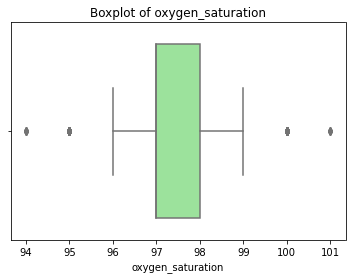

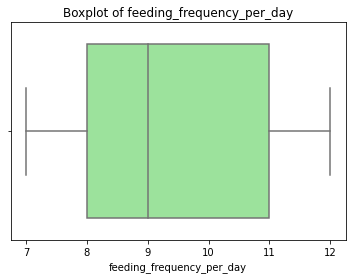

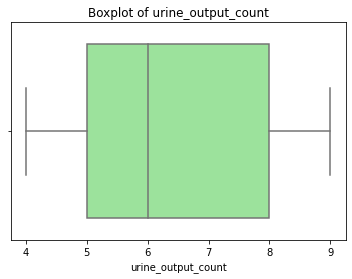

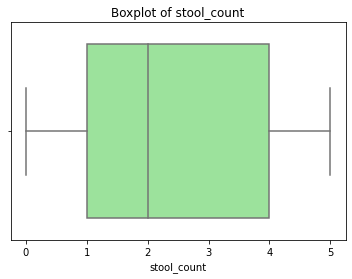

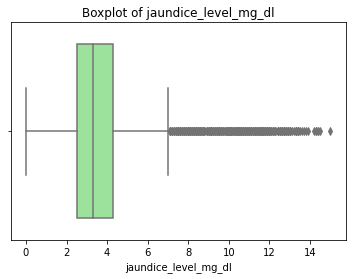

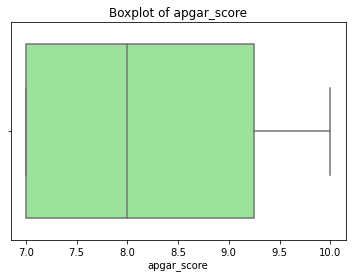

In [25]:
#box plots for numeric columns
for col in numeric_cols_only:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

    #use graphs to identify outliers 

In [26]:
#binary column counts
for col in binary_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f'Counts of {col}')
    plt.show()
    
#use graphs for class imbalances

ValueError: min() arg is an empty sequence

<Figure size 432x288 with 0 Axes>

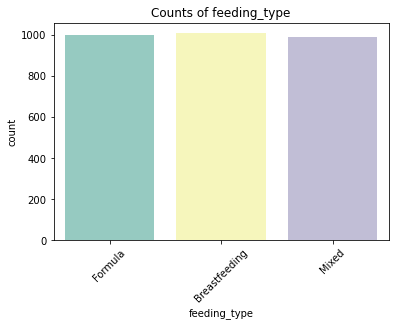

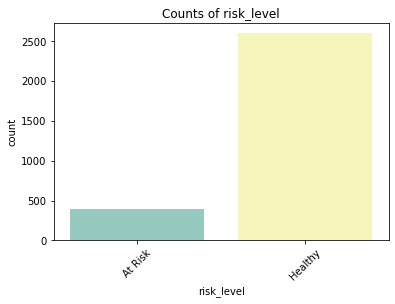

In [27]:
#categorical column counts
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col], palette='Set3')
    plt.title(f'Counts of {col}')
    plt.xticks(rotation=45)
    plt.show()

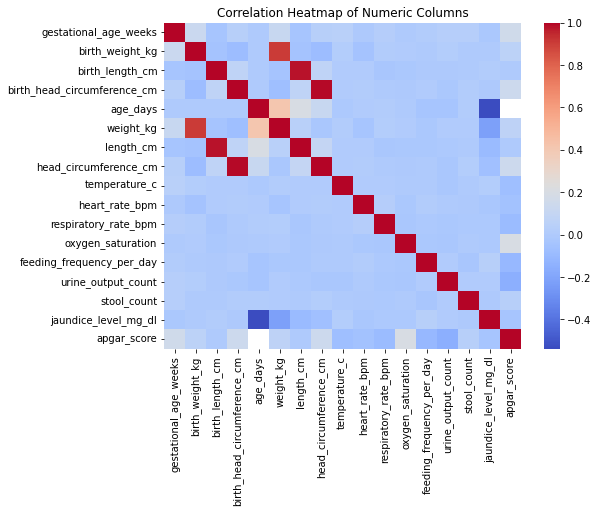

In [28]:
# correlation heatmaps (numeric)
if numeric_cols_only:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[numeric_cols_only].corr(), annot=False, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Columns')
    plt.show()

Strongly correlated pairs: [('birth_weight_kg', 'weight_kg'), ('birth_length_cm', 'length_cm'), ('birth_head_circumference_cm', 'head_circumference_cm'), ('age_days', 'jaundice_level_mg_dl')]


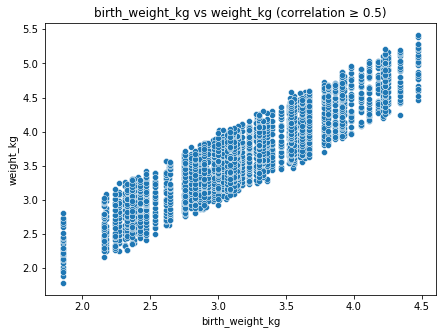

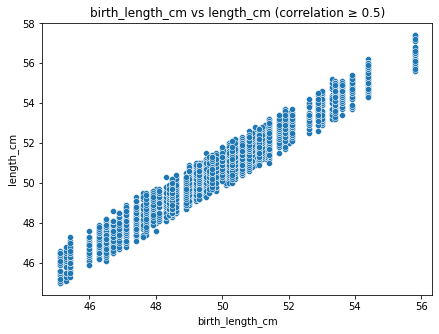

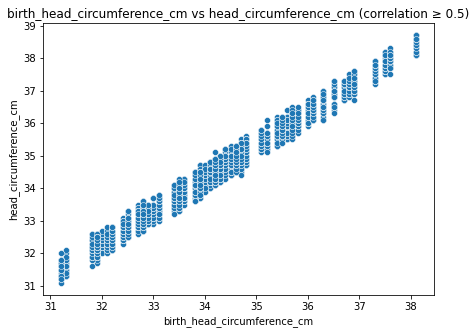

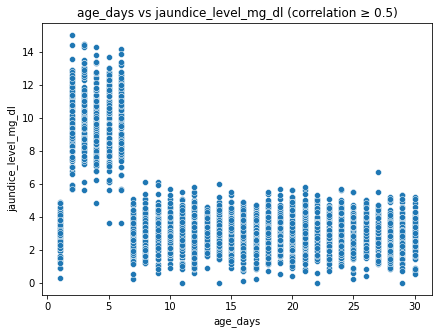

In [29]:
corr_matrix = df[numeric_cols_only].corr().abs()
threshold = 0.5

strong_pairs = []
for col1, col2 in itertools.combinations(numeric_cols_only, 2):
    if corr_matrix.loc[col1, col2] >= threshold:
        strong_pairs.append((col1, col2))

print("Strongly correlated pairs:", strong_pairs)

for x_col, y_col in strong_pairs:
    plt.figure(figsize=(7,5))
    
    # Optional: add hue using first binary column if available
    if binary_cols:
        sns.scatterplot(data=df, x=x_col, y=y_col, hue=binary_cols[0], palette='Set1')
    else:
        sns.scatterplot(data=df, x=x_col, y=y_col)
    
    plt.title(f'{x_col} vs {y_col} (correlation ≥ {threshold})')
    plt.show()